### CSE-221710302060-Shaik Shoaib Aslam

### **Problem Statement**
            The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using 


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading Dataset
data = pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv')
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
# Dropping Unnecessary columns
data.drop(['CASENUM'],axis = 1,inplace = True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [5]:
data.shape

(1340, 6)

In [6]:
# Checking for NULL values
data.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [8]:
# Creating user defined function to impute missing values
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace = True)
    return col

data.apply(lambda col: fill_na(col))
data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

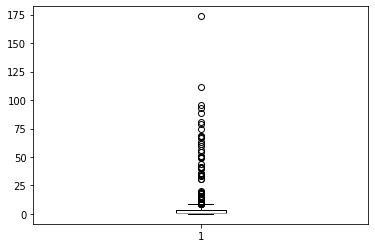

In [9]:
# Visualization of outliers through boxplot
plt.boxplot(data.LOSS)
plt.show()

In [10]:
## know the exact reason for value being an outlier
## Winsorisation --> replacing outlier with nearest value

In [11]:
# Separating I/P and O/P
X = data.iloc[:,1:]
y = data.ATTORNEY

In [12]:
# Splitting data into input and output
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [13]:
from sklearn.linear_model import LogisticRegression
reg =  LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Predicting on training data
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [15]:
# Confusion matrix for training data
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train,y_train_pred)
conf


array([[345, 198],
       [114, 415]], dtype=int64)

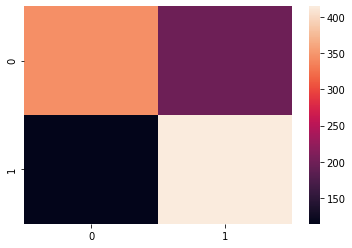

In [16]:
sns.heatmap(conf)

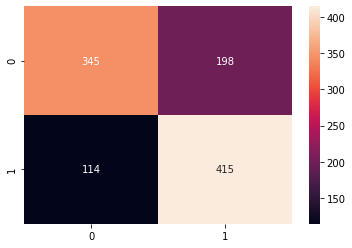

In [17]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot = True,fmt = '3.0f')

In [18]:
## Accessing Confusion matrix values
true_pos = print("True_negative = ",conf[0][0])
false_pos = print("False_positive = ",conf[0][1])
false_neg = print("False_negaitive = ",conf[1][0])
true_neg = print("True_positive = ",conf[1][1])

True_negative =  345
False_positive =  198
False_negaitive =  114
True_positive =  415


In [26]:
true_neg = conf[0][0]
false_pos = conf[0][1]
false_neg = conf[1][0]
true_pos = conf[1][1]

In [27]:
# Accuracy --> (TP+TN)/(TP+FP+TN+FN)
(345+415)/(345+198+114+415)

0.7089552238805971

In [28]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)


0.7089552238805971

In [29]:
# For Precision score
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6769983686786297

In [30]:
pres = true_pos/(true_pos + false_pos)
pres

0.6769983686786297

In [31]:
# Out of all actual values , how many are correctly classified
Recall = true_pos/(true_pos+false_neg)
Recall

0.7844990548204159

In [32]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)

0.7267950963222417